IMPORTING THE DEPENDENCIES

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


CREATING A FUNCTION TO READ THE FILES

In [12]:
def read_file(filename):
    img=cv2.imread(filename)
    plt.imshow(img)

    plt.show()
    return img

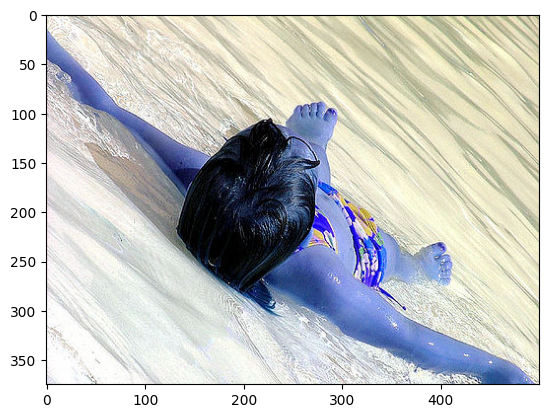

In [13]:
filename='images/667626_18933d713e.jpg'
img=read_file(filename)

MASKING THE EDGE

In [16]:
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)

    return edges

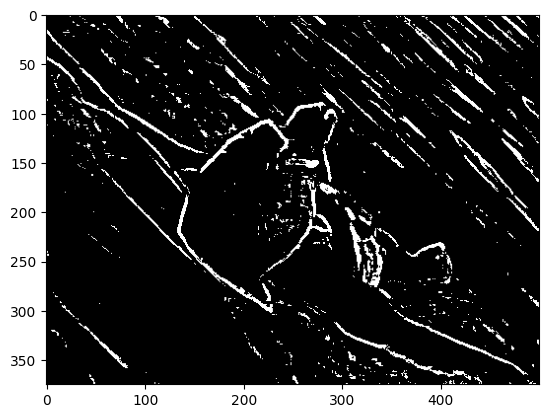

In [21]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap='binary')

REDUCDE THE CLOUR PALLETE

In [25]:
def colour_quantization(image,k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))
    #Determine Criteria
    criteria=(cv2.TermCriteria_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.01)
    # Implementing K-Means
    ret,label,center=cv2.kmeans(data,k, None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)

    return result

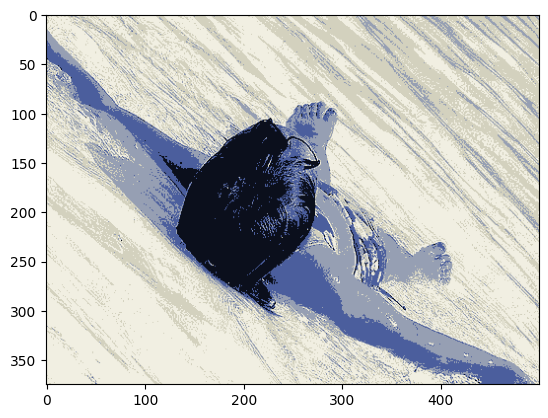

In [26]:
img=colour_quantization(img,k=5 )
plt.imshow(img)
plt.show()

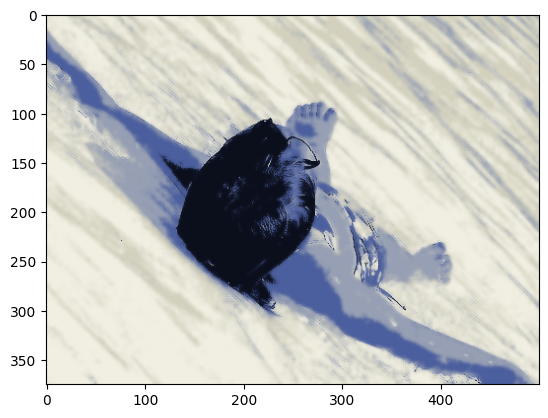

In [27]:
# Reduce the noise 
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

COMBINE EDGE MASK WITH THE QUANTIZING

In [29]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()
    

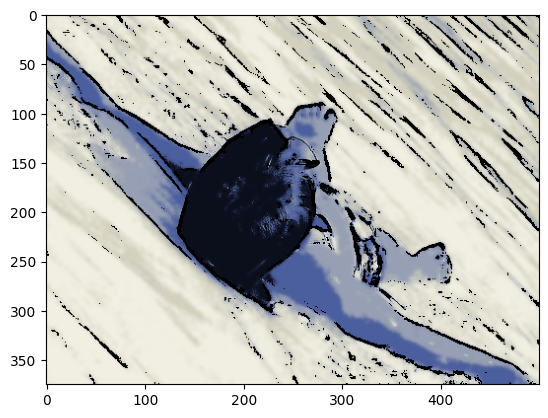

In [31]:
cartoon()